# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

In [29]:
! git clone https://github.com/ds4e/wrangling

fatal: destination path 'wrangling' already exists and is not an empty directory.


**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [37]:
import pandas as pd
import numpy as np

# Read the CSV file
df = pd.read_csv('/content/wrangling/assignment/data/airbnb_hw.csv')

# Clean the Price variable
df['Price_cleaned'] = df['Price'].str.replace('$', '', regex=False)
df['Price_cleaned'] = df['Price_cleaned'].str.replace(',', '', regex=False)
df['Price_cleaned'] = pd.to_numeric(df['Price_cleaned'], errors='coerce')

# Count missing values
missing_values = df['Price_cleaned'].isna().sum()

print(f"Number of missing values after cleaning: {missing_values}")

Number of missing values after cleaning: 0


1) When looking to clean the Price Variable we can see that the numbers are strings. To fix this we should drop the commas for numbers over 999 and once this is done we can convert it to numeric. When looking for null values there seem to be none.

In [38]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv('/content/wrangling/assignment/data/mn_police_use_of_force.csv')

# Clean the subject_injury variable
df['subject_injury_clean'] = df['subject_injury'].fillna('Missing')
df['subject_injury_clean'] = df['subject_injury_clean'].replace({'Y': 'Yes', 'N': 'No'})

# Calculate the proportion of missing values
missing_proportion = (df['subject_injury'].isna().sum() / len(df)) * 100

print(f"Proportion of missing values in subject_injury: {missing_proportion:.2f}%")

# Cross-tabulate cleaned subject_injury with force_type
cross_tab = pd.crosstab(df['force_type'], df['subject_injury_clean'], normalize='index')

print("\nCross-tabulation of force_type and subject_injury (percentages):")
print(cross_tab * 100)

# Calculate raw counts
cross_tab_counts = pd.crosstab(df['force_type'], df['subject_injury_clean'])

print("\nCross-tabulation of force_type and subject_injury (counts):")
print(cross_tab_counts)


Proportion of missing values in subject_injury: 76.19%

Cross-tabulation of force_type and subject_injury (percentages):
subject_injury_clean            Missing          No        Yes
force_type                                                    
Baton                         50.000000    0.000000  50.000000
Bodily Force                  74.772004   11.590668  13.637328
Chemical Irritant             89.202762    8.223478   2.573760
Firearm                        0.000000  100.000000   0.000000
Gun Point Display             25.961538   31.730769  42.307692
Improvised Weapon             50.000000   22.972973  27.027027
Less Lethal                  100.000000    0.000000   0.000000
Less Lethal Projectile         0.000000   33.333333  66.666667
Maximal Restraint Technique  100.000000    0.000000   0.000000
Police K9 Bite                40.259740    2.597403  57.142857
Taser                         75.363428   11.476664  13.159908

Cross-tabulation of force_type and subject_injury (counts):

2) Where seems to be a high percentage of missing values at 76.19% which could raise question to the quality of the data collected. With so much data it could be a collection error or biased in some way. When looking at patterns Bodily Force is the most frequently used tye of force. Some forces have 100% missing data for injuries like Less Lethal and Maximal Restraint Technqiues. This would me that the subject_injury column is somewhat unreliable due to the missing data issues.

In [53]:
df = pd.read_parquet('/content/wrangling/data/justice_data.parquet')

# Convert to numeric type, coercing any non-numeric values to NaN
df['WhetherDefendantWasReleasedPretrial'] = pd.to_numeric(df['WhetherDefendantWasReleasedPretrial'], errors='coerce')

# Replace any NaN values with np.nan
df['WhetherDefendantWasReleasedPretrial'] = df['WhetherDefendantWasReleasedPretrial'].replace({np.nan: np.nan})

# Keep only 0, 1, and np.nan values
df['WhetherDefendantWasReleasedPretrial'] = df['WhetherDefendantWasReleasedPretrial'].where(df['WhetherDefendantWasReleasedPretrial'].isin([0, 1]), np.nan)

print(df['WhetherDefendantWasReleasedPretrial'].value_counts(dropna=False))


WhetherDefendantWasReleasedPretrial
1.0    19154
0.0     3801
NaN       31
Name: count, dtype: int64


In [59]:
df = pd.read_parquet('/content/wrangling/data/justice_data.parquet')
# Convert to numeric, coercing errors to NaN
df['ImposedSentenceAllChargeInContactEvent'] = pd.to_numeric(df['ImposedSentenceAllChargeInContactEvent'], errors='coerce')

# Replace 0 with NaN where SentenceType is not 'Time to serve'
mask = (df['SentenceTypeAllChargesAtConvictionInContactEvent'] != 'Time to serve') & (df['ImposedSentenceAllChargeInContactEvent'] == 0)
df.loc[mask, 'ImposedSentenceAllChargeInContactEvent'] = np.nan

# Replace negative values with NaN
df['ImposedSentenceAllChargeInContactEvent'] = df['ImposedSentenceAllChargeInContactEvent'].where(df['ImposedSentenceAllChargeInContactEvent'] >= 0, np.nan)

# Cap unreasonably high values (e.g., over 100 years) at 36500 days (100 years)
df['ImposedSentenceAllChargeInContactEvent'] = df['ImposedSentenceAllChargeInContactEvent'].clip(upper=36500)


4) First we want to unsure we are working with numerics and not strings. Replace 0 with NaN because a sentence of 0 days doesn't make sense. Replace negative values with NaN because those are likely errors. Lastly, capping unreasonably high values.

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [85]:
# 1
df = pd.read_excel('/content/wrangling/assignment/data/GSAF5.xls')|

In [87]:
#2
# Drop columns without data (Unnamed: 22 to Unnamed: 255)
df = df.drop(columns=[col for col in df.columns if col.startswith('Unnamed:')])

# Display the remaining columns
print(df.columns)

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order'],
      dtype='object')


In [88]:
#3
# Convert Year to numeric, coercing errors to NaN
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Filter rows since 1940
df_filtered = df[df['Year'] >= 1940]

# Get the count of each year
year_counts = df_filtered['Year'].value_counts().sort_index()

# Display the results
print(year_counts)

Year
1940.0     24
1941.0     27
1942.0     41
1943.0     28
1944.0     31
         ... 
2022.0     98
2023.0    109
2024.0     49
2025.0      4
2026.0      1
Name: count, Length: 87, dtype: int64


3. It seems taht the shark attacks are increaing over the years. But this could possibly be that it is easier to report these types of incidents. The range seems to be from 0 to 2026.

<Axes: >

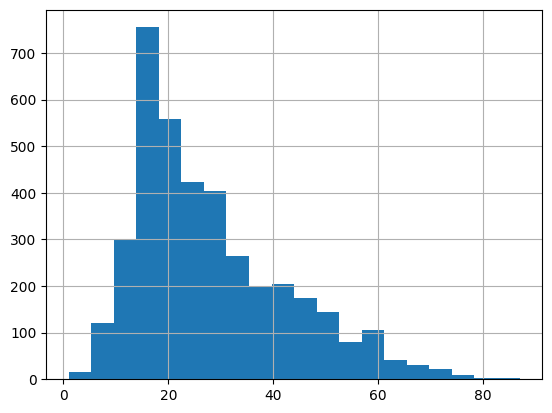

In [90]:
#4
# Convert Age to numeric, coercing errors to NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Create a histogram of ages
df['Age'].hist(bins=20)
#5

In [91]:
#5
#Calculate proportion of male victims
male_proportion = (df['Sex'] == 'M').mean()
print(f"Proportion of male victims: {male_proportion:.2f}")


Proportion of male victims: 0.80


In [111]:
#6
# Clean the Type column
df['Type'] = df['Type'].apply(lambda x: 'Provoked' if str(x).strip().lower() == 'provoked' else
                                        'Unprovoked' if str(x).strip().lower() == 'unprovoked' else
                                        'Unknown')

print(df['Type'].unique())
# Calculate proportion of unprovoked attacks
unprovoked_proportion = (df['Type'] == 'Unprovoked').mean()
print(f"Proportion of unprovoked attacks: {unprovoked_proportion:.2f}")


['Provoked' 'Unprovoked' 'Unknown']
Proportion of unprovoked attacks: 0.74


In [108]:
#7
# Categorize outcomes as Y, N, or Unknown

# Clean the Fatal (Y/N) column
df['Fatal Y/N'] = df['Fatal Y/N'].apply(lambda x: 'Y' if str(x).upper().startswith('Y') else
                                                      'N' if str(x).upper().startswith('N') else
                                                      'Unknown')
# Check the unique values
print(df['Fatal Y/N'].unique())


['N' 'Y' 'Unknown']


In [113]:
#8
# Clean the Sex column
df['Sex'] = df['Sex'].apply(lambda x: 'Male' if str(x).strip().upper() == 'M' else
                                       'Female' if str(x).strip().upper() == 'F' else
                                       'Other')
# Unprovoked attacks by gender
unprovoked_by_gender = df[df['Type'] == 'Unprovoked']['Sex'].value_counts(normalize=True)
print("Proportion of unprovoked attacks by gender:")
print(unprovoked_by_gender)

# Fatality rates by attack type and gender
fatality_by_type = df.groupby('Type')['Fatal Y/N'].value_counts(normalize=True).unstack()
fatality_by_gender = df.groupby('Sex')['Fatal Y/N'].value_counts(normalize=True).unstack()

print("\nFatality rates by attack type:")
print(fatality_by_type)
print("\nFatality rates by gender:")
print(fatality_by_gender)


Proportion of unprovoked attacks by gender:
Sex
Male      0.837119
Female    0.130072
Other     0.032809
Name: proportion, dtype: float64

Fatality rates by attack type:
Fatal Y/N          N   Unknown         Y
Type                                    
Provoked    0.949922  0.017214  0.032864
Unknown     0.374167  0.461667  0.164167
Unprovoked  0.741021  0.015919  0.243060

Fatality rates by gender:
Fatal Y/N         N   Unknown         Y
Sex                                    
Female     0.760101  0.088384  0.151515
Male       0.696295  0.082829  0.220876
Other      0.619863  0.191781  0.188356


8) It seems that unprovoked men are more likely to get attack than unprovoked women. When Provoked attacks seem to be more fatal. Men seem to have higher fatality rates. Sharks are cool!

In [116]:
#9
# Clean the Species column
df['Species'] = df['Species '].str.lower()

# Count attacks by white sharks
white_shark_attacks = df['Species'].str.contains('white').sum()

# Count total attacks with species information
total_attacks_with_species = df['Species'].notna().sum()

# Calculate proportion
proportion = white_shark_attacks / total_attacks_with_species

print(f"Proportion of attacks by white sharks: {proportion:.2f}")


Proportion of attacks by white sharks: 0.19


**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

1. The paper introduces the concept of tidy data, a structured approach to organizing datasets in a consistent format that makes analysis easier. Wickham discusses the principles of tidy data, identifies common problems with messy datasets, and demonstrates how data transformation techniques, such as reshaping, can be used to tidy messy data.

2. The tidy data standard is meant to create a consistent framework for organizing datasets, making data cleaning and analysis more efficient. It ensures that data is structured in a way that aligns with standard statistical and machine learning tools, minimizing the need for extensive preprocessing before analysis.

3. "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." This is a reference to Tolstoy’s Anna Karenina and suggests that tidy datasets follow a uniform structure, while messy datasets can be disorganized in many different ways.

"For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general." This means that while it’s often intuitive to distinguish variables (columns) and observations (rows) in a specific dataset, formally defining these concepts across all datasets is more challenging due to the diversity of data structures.

4. Values: The individual pieces of data contained in a dataset.
Variables: A measured characteristic.
Observations: A collection of related values corresponding to a single entity.

5. A dataset is tidy when:
- Each variable forms a column.
- Each observation forms a row.
- Each type of observational unit forms a table.
This structure ensures that data is organized in a way that facilitates analysis without requiring significant reshaping.

6. Five common problems with messy data:
- Column headers are values, not variable names.
- Multiple variables are stored in one column.
- Variables are stored in rows instead of columns.
- Multiple types of observational units are stored in the same table.
- A single observational unit is spread across multiple tables.

Table 4 is messy because it does not follow the tidy data principles—variables are spread across multiple columns instead of being stored in a single variable column. Melting  is the process of transforming a dataset from a wide format to a long format, where each row corresponds to a single observation.

7. Table 11 is messy because it contains multiple variables in a single column, making analysis difficult. Table 12 is tidy and molten because it has been transformed into a long format where each column corresponds to a variable, making it easier to analyze and manipulate.

8. Wickham acknowledges that while tidy data makes analysis easier, most real-world datasets are messy. Since existing tools often assume tidy data, there is a challenge: should we focus on improving tools to handle messy data, or should we work on making more datasets tidy before analysis?
Wickham hopes that future work will focus on improving data manipulation tools, making it easier to transform messy data into a tidy format. He also hopes for better integration of tidy data principles into statistical and data analysis workflows.





**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?